# Benchmark analysis.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Import the data.
Note that you need to create the data first using the mazes Rust program. 

In [58]:
filename = "./maze_benchmark_size_31x31_100_mazes_100_random_positions.csv"
benchmark_name = filename[2:-4]
print(benchmark_name)
df = pd.read_csv(filename, delimiter=';')
df.head(10)

maze_benchmark_size_31x31_100_mazes_100_random_positions


,maze_id,generation_algorithm,manhattan_distance,A*,BFS,DFS
0,0,Kruskal,56,103,275,305
1,0,Kruskal,25,93,319,322
2,0,Kruskal,17,108,175,404
3,0,Kruskal,34,85,124,91
4,0,Kruskal,17,42,110,416
5,0,Kruskal,10,395,433,165
6,0,Kruskal,11,73,115,36
7,0,Kruskal,15,392,447,243
8,0,Kruskal,12,80,236,111
9,0,Kruskal,26,94,322,133


In [59]:
generation_algorithms = df["generation_algorithm"].unique()
print("Generation algorithms: ", generation_algorithms)
for generation_algorithm in generation_algorithms:
    print(generation_algorithm, "number of entries:", df[df["generation_algorithm"] == generation_algorithm].shape[0])

Generation algorithms:  ['Kruskal' 'recursive backtracking' 'Wilson']
Kruskal number of entries: 10100
recursive backtracking number of entries: 10100
Wilson number of entries: 10100


In [60]:
solving_algorithms = [x for x in list(df.keys()) if x not in ['maze_id', 'generation_algorithm', 'manhattan_distance']]
print("Solving algorithms: ", solving_algorithms)

Solving algorithms:  ['A*', 'BFS', 'DFS']


## Visualization.

In [61]:
# Only plot for the start position in the upper left and the end position in the bottom right corner.


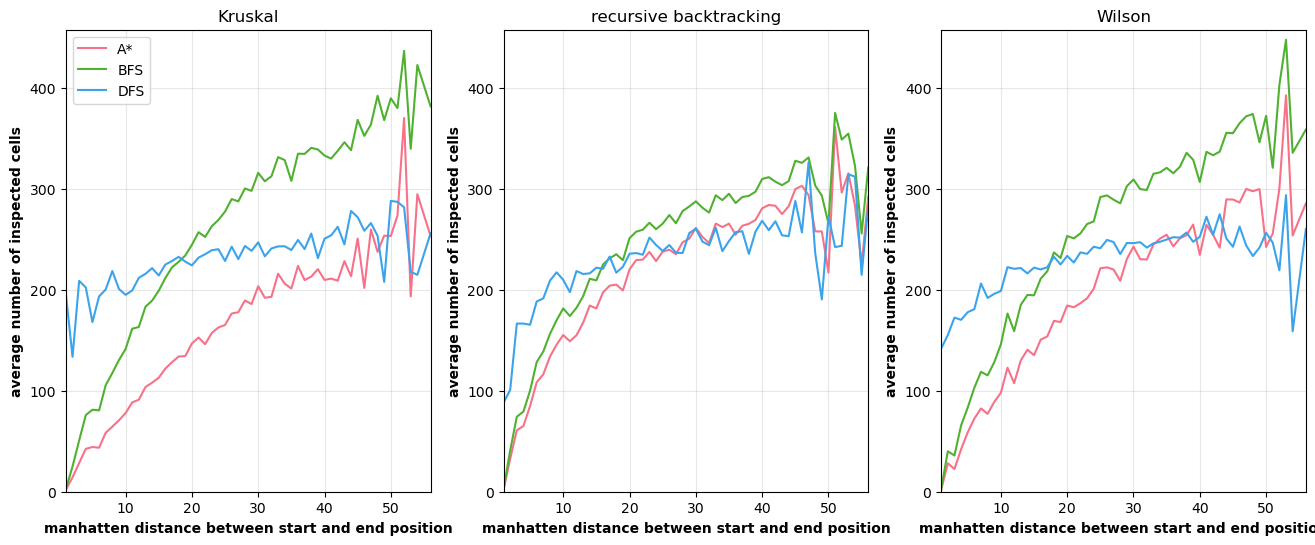

In [62]:
fig, axes = plt.subplots(1, len(generation_algorithms), figsize=(16,6))
# We want a color palette to distinguish the different solving algorithms.
clrs = sns.color_palette("husl", len(generation_algorithms))

y_max = 0 # for equal y ranges.
for idx_gen, generation_algorithm in enumerate(generation_algorithms):
    ax = axes[idx_gen]
    # Filter only the current generation algorithm.
    df_generation_algorithm = df[df["generation_algorithm"] == generation_algorithm]
    # For all solving algorithms, calculate the statistic and plot it.
    for idx_sol, solving_algorithm in enumerate(solving_algorithms):
        # Calculate average and standard deviation
        df_stats = df_generation_algorithm.groupby("manhattan_distance")[solving_algorithm].agg(['mean']).reset_index()
        y_max = max(y_max, df_stats["mean"].max())
        ax.plot(df_stats["manhattan_distance"], df_stats["mean"], c=clrs[idx_sol], label=solving_algorithm)
    label_weight = "bold"
    ax.set_title(generation_algorithm)
    ax.set_xlabel("manhatten distance between start and end position", weight=label_weight)
    ax.set_ylabel("average number of inspected cells", weight=label_weight)
    xlim = [min(df["manhattan_distance"]), max(df["manhattan_distance"])]
    ax.set_xlim(xlim)
    ax.grid(alpha=0.3)
    if idx_gen == 0:
        ax.legend()
# Set equal y ranges.
for ax in axes:
    ax.set_ylim([0, y_max + 10])
plt.show()
fig.savefig("./analysis_" + benchmark_name + ".png", bbox_inches="tight")